# Método da bisseção aplicada ao cálculo de probabilidades

Seja $Z \sim \mathrm{Normal}(0, 1)$. Dado um valor $p$, queremos saber qual $k$ é tal que:

$$P(Z \le k) = p$$

Para isto, um método da bisseção simples será usado. 

In [1]:
import scipy.stats

tole = 1e-7
prob = 0.99
normal = scipy.stats.norm(0, 1)

In [2]:
def bissect(p=prob, tol=tole):
    a = -1
    b = 1

    while normal.cdf(a) > p: a = a*2
    while normal.cdf(b) < p: b = b*2

    curr = normal.cdf(b)

    cnt = 0
    while (cnt < 200):
        m = (a+b)/2
        if (normal.cdf(m) < p):
            a = m
        else:
            b = m
        cnt += 1

    return a


In [3]:
P = [(0.1*x+0.1, bissect(0.1*x+0.1)) for x in range(9)]
P.extend([(0.01*x+0.9, bissect(0.01*x+0.9)) for x in range(10)])
P.extend([(0.001*x+0.99, bissect(0.001*x+0.99)) for x in range(10)])
P.extend([(0.0001*x+0.999, bissect(0.0001*x+0.999)) for x in range(10)])

for p, bis in P:
    print('Probability: {}, X = {}'.format(p, bis))

Probability: 0.1, X = -1.2815515655446006
Probability: 0.2, X = -0.8416212335729144
Probability: 0.30000000000000004, X = -0.5244005127080408
Probability: 0.4, X = -0.25334710313579983
Probability: 0.5, X = -6.957291061679418e-17
Probability: 0.6, X = 0.2533471031357996
Probability: 0.7000000000000001, X = 0.5244005127080408
Probability: 0.8, X = 0.841621233572914
Probability: 0.9, X = 1.2815515655446004
Probability: 0.9, X = 1.2815515655446004
Probability: 0.91, X = 1.3407550336902163
Probability: 0.92, X = 1.4050715603096327
Probability: 0.93, X = 1.4757910281791706
Probability: 0.9400000000000001, X = 1.5547735945968535
Probability: 0.9500000000000001, X = 1.6448536269514726
Probability: 0.96, X = 1.7506860712521688
Probability: 0.97, X = 1.8807936081512493
Probability: 0.98, X = 2.053748910631821
Probability: 0.99, X = 2.3263478740408385
Probability: 0.99, X = 2.3263478740408385
Probability: 0.991, X = 2.3656181268642897
Probability: 0.992, X = 2.408915545815458
Probability: 0.993,

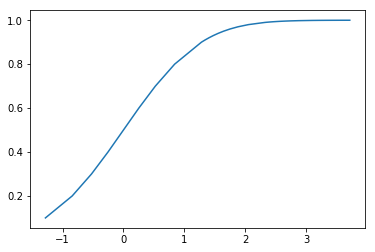

In [4]:
import matplotlib.pyplot as plt
plt.plot([pt[1] for pt in P], [pt[0] for pt in P])
plt.show()

In [7]:
print(normal.cdf(1))
print(normal.cdf(2))
print(normal.cdf(3))
print(normal.cdf(4))

0.841344746069
0.977249868052
0.998650101968
0.999968328758
